In [1]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats

!whoami
!date

alibow
Mon Mar 30 15:08:43 PDT 2020


# 1. Exploring the output and doing spot-check validation on the intervention results

In [76]:
# View mortality rates for Ethiopia

index_columns = ['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[0] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[0] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
    # note: exclude folic_acid_fortification results here because I tested and 
    # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','vitamin_a_fortification_group','input_draw','age_group'], as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','vitamin_a_fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                         vitamin_a_fortification_group age_group               
baseline                         covered                       1_to_4            0.0   
                                                               early_neonatal   10.0   
                                                               late_neonatal    10.0   
                                                               post_neonatal    10.0   
                                 effectively_covered           1_to_4           15.0   
                                                               early_neonatal   15.0   
                                                               late_neonatal    15.0   
                                                               post_neonatal    15.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
vitamin_a_fortification_scale_up covered                       1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   

                                                                                        mean  \
scenario                         vitamin_a_fortification_group age_group                       
baseline                         covered                       1_to_4                    NaN   
                                                               early_neonatal  815774.016087   
                                                               late_neonatal   148473.206181   
                                                               post_neonatal    95282.235288   
                                 effectively_covered           1_to_4              45.230929   
                                                               early_neonatal       0.000000   
                                                               late_neonatal        0.000000   
                                                               post_neonatal      119.189057   
                                 uncovered                     1_to_4              76.706558   
                                                               early_neonatal   14498.512157   
                                                               late_neonatal     1321.121251   
                                                               post_neonatal      357.410666   
vitamin_a_fortification_scale_up covered                       1_to_4               0.000000   
                                                               early_neonatal  811096.091149   
                                                               late_neonatal   140152.876430   
                                                               post_neonatal    92783.522042   
                                 effectively_covered          

In [93]:
# do the same for nigeria

index_columns = ['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[1] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[1] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
    # note: exclude folic_acid_fortification results here because I tested and 
    # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','vitamin_a_fortification_group','input_draw','age_group'], as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','vitamin_a_fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                         vitamin_a_fortification_group age_group               
baseline                         covered                       1_to_4            0.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
vitamin_a_fortification_scale_up covered                       1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   

                                                                                        mean  \
scenario                         vitamin_a_fortification_group age_group                       
baseline                         covered                       1_to_4                    NaN   
                                                               early_neonatal  773558.978890   
                                                               late_neonatal   101572.125137   
                                                               post_neonatal    94019.296751   
                                 effectively_covered           1_to_4             218.549101   
                                                               early_neonatal       0.000000   
                                                               late_neonatal        0.000000   
                                                               post_neonatal      328.213598   
                                 uncovered                     1_to_4             226.860017   
                                                               early_neonatal   20358.457882   
                                                               late_neonatal     1582.479090   
                                                               post_neonatal      630.397672   
vitamin_a_fortification_scale_up covered                       1_to_4               0.000000   
                                                               early_neonatal  735721.048283   
                                                               late_neonatal    97791.713655   
                                                               post_neonatal    82748.744027   
                                 effectively_covered          

## Conclusions from this exploration:

1. Mortality rates are too high in the "covered" group for all age groups (not relevant for 1 to 4 age-groups because they are >6 months old and therefore effectively covered).

2. For ETHIOPIA: The effect of the intervention (effectively covered versus uncovered groups) appears to be much stronger in the baseline scneario than the uncovered scenario. Is there something we are doing incorrectly here that is causing that? I would expect the "time to effect" period to cause the intervention to be slightly less effective than baseline coverage, but it seems to be a very significant difference for the 1-4 age group specifically. for NIGERIA, the opposite problem appears to be the case (mortality rate for uncovered/effetively covered in the vit_a_scale_up >> baseline for the 1-4 age group).

Maybe we implemented our baseline calibration incorrectly??? I think that this model was built before we had the documentation for how to do this in the concept model.

# 2. CALCULATING OUTCOMES AVERTED DUE TO VITAMIN A FORTIFICATION AND PLOT RESULTS

In [3]:
output_dirs = ['/ihme/costeffectiveness/results/vivarium_conic_lsff/v5.0_vitamin_a_fortification/ethiopia/2020_03_26_08_33_10/count_data/',
              '/ihme/costeffectiveness/results/vivarium_conic_lsff/v5.0_vitamin_a_fortification/nigeria/2020_03_24_23_27_55/count_data/']

locations = ['Ethiopia','Nigeria']

# india filepath for when results finish
    # '/ihme/costeffectiveness/results/vivarium_conic_lsff/v5.0_vitamin_a_fortification/india/2020_03_26_21_28_29/count_data/',


In [4]:
index_cols = ['year', 'age_group', 'sex', 'cause', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

In [5]:
# load and merge stratified count results for each location, outcome
master_counts = pd.DataFrame()
master_rates = pd.DataFrame()
for i in range(len(output_dirs)):
    yll_count = pd.read_hdf(output_dirs[i] + 'ylls.hdf').rename(columns={'value':'ylls'}).drop(columns='measure')
    yld_count = pd.read_hdf(output_dirs[i] + 'ylds.hdf').rename(columns={'value':'ylds'}).drop(columns='measure')
    daly_count = yll_count.merge(yld_count, right_on=index_cols, left_on=index_cols)
    daly_count['dalys'] = daly_count['ylls'] + daly_count['ylds']
    deaths = pd.read_hdf(output_dirs[i] + 'deaths.hdf').rename(columns={'value':'deaths'}).drop(columns='measure')
    data = daly_count.merge(deaths, right_on=index_cols, left_on=index_cols)
    person_time = pd.read_hdf(output_dirs[i] + 'person_time.hdf').rename(columns={'value':'person_time'}).drop(columns='measure')
    counts = data.merge(person_time, right_on=['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario'], 
                     left_on=['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario'])
    counts['location'] = locations[i]
    master_counts = master_counts.append(counts)
master_counts.head()

,year,age_group,sex,cause,folic_acid_fortification_group,vitamin_a_fortification_group,input_draw,scenario,ylls,ylds,dalys,deaths,person_time,location
0,2020,1_to_4,female,diarrheal_diseases,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
1,2020,1_to_4,female,lower_respiratory_infections,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
2,2020,1_to_4,female,measles,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
3,2020,1_to_4,female,neural_tube_defects,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
4,2020,1_to_4,female,diarrheal_diseases,covered,covered,21,folic_acid_fortification_scale_up,0.0,0.0,0.0,0.0,0.0,Ethiopia


In [84]:
# Calculate overall (unstratified results):

overall = master_counts.groupby(['location','scenario','input_draw'], as_index=False).sum()
overall_rates = pd.DataFrame.copy(overall)
for measure in ['ylls','ylds','dalys','deaths','person_time']:
    overall_rates[measure] = overall_rates[measure] / overall_rates['person_time'] * 100_000 
overall_baseline = (overall_rates.where(overall_rates['scenario'] == 'baseline').dropna()
                    .set_index(['location','input_draw']).drop(columns='scenario'))
overall_intervention = (overall_rates.where(overall_rates['scenario'] == 'vitamin_a_fortification_scale_up').dropna()
                        .set_index(['location','input_draw']).drop(columns='scenario'))
overall_results = overall_baseline - overall_intervention
overall_results = overall_results.reset_index().drop(columns=['input_draw','person_time']).groupby(['location']).describe(percentiles=[0.025,0.975])
overall_results.head()

ylls                                                              \
         count        mean         std         min        2.5%         50%   
location                                                                     
Ethiopia  25.0  260.397378  172.019201 -166.531790 -121.223468  306.293081   
Nigeria   25.0  261.628297  114.741206   19.770126   50.003979  237.203848   

                                  ylds            ...       dalys              \
               97.5%         max count      mean  ...       97.5%         max   
location                                          ...                           
Ethiopia  470.096255  473.455766  25.0  5.207759  ...  478.955163  479.366574   
Nigeria   472.955192  489.454275  25.0  2.733787  ...  476.154475  493.044479   

         deaths                                                              \
          count      mean       std       min      2.5%       50%     97.5%   
location                                                                      
Ethiopia   25.0  3.025250  1.999118 -1.937645 -1.409064  3.552710  5.459604   
Nigeria    25.0  3.052793  1.338499  0.230597  0.584950  2.769838  5.520768   

                    
               max  
location            
Ethiopia  5.495183  
Nigeria   5.708301  

[2 rows x 32 columns]

In [87]:
# define function to calculate averted outcomes (dalys, ylds, ylls, deaths) in rate space
# by specified stratifying variables

def get_stratified_averted_results(strata_cols):  
    overall = master_counts.groupby((['location','scenario','input_draw']+strata_cols), as_index=False).sum()
    overall_rates = pd.DataFrame.copy(overall)
    overall_rates = overall_rates.where(overall_rates['person_time'] != 0).dropna()
    for measure in ['ylls','ylds','dalys','deaths','person_time']:
            overall_rates[measure] = overall_rates[measure] / overall_rates['person_time'] * 100_000
    overall_baseline = (overall_rates.where(overall_rates['scenario'] == 'baseline').dropna()
                        .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    overall_intervention = (overall_rates.where(overall_rates['scenario'] == 'vitamin_a_fortification_scale_up').dropna()
                            .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    overall_results = overall_baseline - overall_intervention
    overall_results = (overall_results.reset_index()
                       .drop(columns=['input_draw','person_time']).groupby((['location']+strata_cols))
                       .describe(percentiles=[0.025,0.975,0.25,0.75]))
    return overall_results

In [104]:
# define function to calculate averted outcomes (dalys, ylds, ylls, deaths) in rate space
# by specified stratifying variables

def get_stratified_averted_results(strata_cols):  
    overall = master_counts.groupby((['location','scenario','input_draw']+strata_cols), as_index=False).sum()
    overall_rates = pd.DataFrame.copy(overall)
    for measure in ['ylls','ylds','dalys','deaths','person_time']:
            overall_rates[measure] = overall_rates[measure] / overall_rates['person_time'] * 100_000
    overall_baseline = (overall_rates.where(overall_rates['scenario'] == 'baseline').dropna()
                        .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    overall_intervention = (overall_rates.where(overall_rates['scenario'] == 'vitamin_a_fortification_scale_up').dropna()
                            .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    merged = overall_baseline.merge(overall_intervention, right_on=(['location','input_draw']+strata_cols),
                                    left_on=(['location','input_draw']+strata_cols), 
                                    suffixes=('_baseline','_intervention'))
    # drop rows where there is zero person time in either the baseline or intervention
    merged = merged.where(merged['person_time_intervention'] != 0).where(merged['person_time_baseline'] != 0).dropna()
    for measure in ['ylls','ylds','dalys','deaths']:
        merged[f'{measure}'] = merged[f'{measure}_baseline'] - merged[f'{measure}_intervention'] 
    merged = (merged.reset_index().groupby((['location']+strata_cols))
                       .describe(percentiles=[0.025,0.975,0.25,0.75]))
    return merged

In [107]:
averted_by_coverage = get_stratified_averted_results(['vitamin_a_fortification_group'])
averted_by_coverage['deaths']

# NOTE: results here do not make sense...
    # we would expect to see ~0 averted dalys in the uncovered and covered groups and 
    # POSITIVE dalys averted in the effectively_covered groups
    
# also, note... there are only 10 input draws for "the covered" scenario here because not 

count         mean           std  \
location vitamin_a_fortification_group                                     
Ethiopia covered                         10.0  2823.708797  12136.190409   
         effectively_covered             15.0   -16.128067     27.800649   
         uncovered                       25.0    -2.405992      1.230173   
Nigeria  covered                         25.0  9568.310190   2838.371445   
         effectively_covered             25.0    27.011483      4.889288   
         uncovered                       25.0   -33.269588      3.306627   

                                                 min          2.5%  \
location vitamin_a_fortification_group                               
Ethiopia covered                       -13473.973045 -12766.184005   
         effectively_covered              -64.596866    -61.634098   
         uncovered                         -5.124467     -4.867528   
Nigeria  covered                         3134.577688   3658.137574   
         effectively_covered               15.586966     18.292519   
         uncovered                        -39.914015    -39.073032   

                                                25%          50%  \
location vitamin_a_fortification_group                             
Ethiopia covered                       -4504.174806  1972.252072   
         effectively_covered             -44.968774     1.147234   
         uncovered                        -3.071581    -2.384510   
Nigeria  covered                        8085.795500  8958.729649   
         effectively_covered              23.707631    26.640479   
         uncovered                       -35.525169   -32.751968   

                                                 75%         97.5%  \
location vitamin_a_fortification_group                               
Ethiopia covered                         6642.909786  23522.148686   
         effectively_covered                2.672410     11.864787   
         uncovered                         -1.672959     -0.222477   
Nigeria  covered                        11750.487727  13904.547716   
         effectively_covered               30.098156     35.910068   
         uncovered                        -30.923493    -28.438721   

                                                 max  
location vitamin_a_fortification_group                
Ethiopia covered                        24513.416935  
         effectively_covered               12.278743  
         uncovered                         -0.168447  
Nigeria  covered                        15122.760968  
         effectively_covered               38.257181  
         uncovered                        -27.843491

In [110]:
averted_by_year = get_stratified_averted_results(['year'])
averted_by_year['deaths']

count      mean       std       min      2.5%       25%  \
location year                                                            
Ethiopia 2020   25.0  2.892358  2.083434 -1.975096 -1.382289  1.973848   
         2021   25.0  2.924216  2.065207 -2.082168 -1.677953  1.962943   
         2022   25.0  2.978357  2.006426 -2.224912 -1.433012  1.820894   
         2023   25.0  3.032454  2.081725 -1.607640 -1.321458  1.860411   
         2024   25.0  3.222659  2.028442 -1.827121 -1.227352  2.349972   
Nigeria  2020   25.0  1.954746  1.148664  0.247531  0.321454  1.236029   
         2021   25.0  2.097882  0.921498  0.247550  0.394865  1.486942   
         2022   25.0  2.725514  1.289876  0.123111  0.449820  1.900239   
         2023   25.0  3.660306  1.728020  0.241673  0.671369  3.010499   
         2024   25.0  4.216857  1.770964  0.300272  0.938732  3.191996   

                    50%       75%     97.5%       max  
location year                                          
Ethiopia 2020  3.329037  3.948684  6.219243  6.294151  
         2021  3.369443  4.473709  5.584698  5.875338  
         2022  3.504125  4.331550  5.718791  5.899345  
         2023  3.405668  4.291135  6.074151  6.291415  
         2024  3.875220  4.570230  5.522166  5.522588  
Nigeria  2020  1.607887  3.092868  4.034483  4.333030  
         2021  1.975079  2.666918  3.732490  4.411905  
         2022  2.511201  3.670071  5.205620  5.306846  
         2023  3.512252  4.364527  7.038280  7.077066  
         2024  4.205202  5.315375  7.557582  7.569236

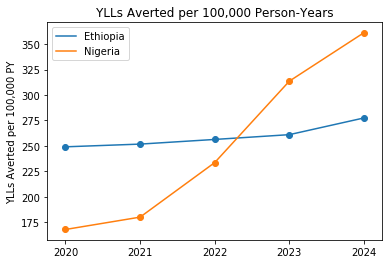

In [85]:
# plot results by year

data = averted_by_year.reset_index()
ethiopia = data.where(data['location'] == 'Ethiopia').dropna()
nigeria = data.where(data['location'] == 'Nigeria').dropna()

plt.scatter(ethiopia['year'], ethiopia['ylls','mean'])
plt.plot(ethiopia['year'], ethiopia['ylls','mean'])

plt.scatter(nigeria['year'], nigeria['ylls','mean'])
plt.plot(nigeria['year'], nigeria['ylls','mean'])

plt.title('YLLs Averted per 100,000 Person-Years')
plt.legend(['Ethiopia','Nigeria'])
plt.ylabel('YLLs Averted per 100,000 PY')
plt.savefig('ethiopia_and_nigeria_by_year.png')

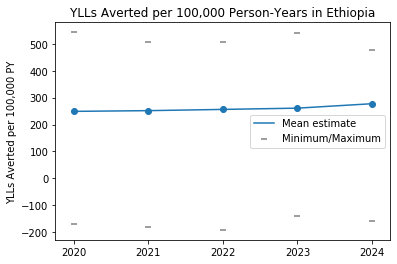

In [92]:
# Ethiopia results by year, with uncertainty (min/max)
data = averted_by_year.reset_index()
data = data.where(data['location'] == 'Ethiopia').dropna()


plt.plot(data['year'], data['ylls','mean'])
plt.scatter(data['year'], data['ylls','min'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','max'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','mean'])

plt.legend(['Mean estimate','Minimum/Maximum'])
plt.title('YLLs Averted per 100,000 Person-Years in Ethiopia')
plt.ylabel('YLLs Averted per 100,000 PY')
plt.savefig('ethiopia_by_year_with_error.png')

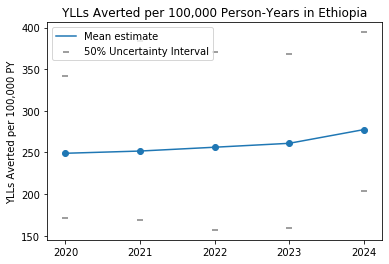

In [91]:
# Ethiopia results by year, with uncertainty (min/max)
data = averted_by_year.reset_index()
data = data.where(data['location'] == 'Ethiopia').dropna()


plt.plot(data['year'], data['ylls','mean'])
plt.scatter(data['year'], data['ylls','25%'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','75%'], marker='_', c='grey')
plt.scatter(data['year'], data['ylls','mean'])

plt.legend(['Mean estimate','50% Uncertainty Interval'])
plt.title('YLLs Averted per 100,000 Person-Years in Ethiopia')
plt.ylabel('YLLs Averted per 100,000 PY')
plt.savefig('ethiopia_by_year_with_error.png')

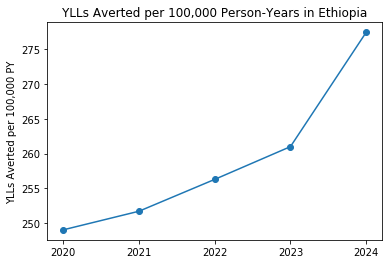

In [83]:
# Ethiopia results without uncertainty

data = averted_by_year.reset_index()
ethiopia = data.where(data['location'] == 'Ethiopia').dropna()

plt.scatter(ethiopia['year'], ethiopia['ylls','mean'])
plt.plot(ethiopia['year'], ethiopia['ylls','mean'])

plt.title('YLLs Averted per 100,000 Person-Years in Ethiopia')
plt.ylabel('YLLs Averted per 100,000 PY')
plt.savefig('ethiopia_by_year.png')

In [20]:
# define plotting function for overall, non-stratified results
# NOTE: spacing will need to be edited when India results are completed

def make_dot_plots(dataset, outcome_var):
    data = pd.DataFrame.copy(dataset) 
    
    if outcome_var == 'dalys':
        outcome_name_long = 'Disability Adjusted Life Years'
        outcome_name_short = 'DALYs'
    elif outcome_var == 'ylls':
        outcome_name_long = 'Years of Life Lost'
        outcome_name_short = 'YLLs'
    elif outcome_var == 'ylds':
        outcome_name_long = 'Years Lived with Disability'
        outcome_name_short = 'YLDs'
    else:
        outcome_name_long = 'Deaths'
        outcome_name_short = 'Deaths'
        
        
    plt.plot([0.1,0.5],[0,0],'--',c='grey')

    plt.plot([0.2,0.2],[data[outcome_var,'min'][0],data[outcome_var,'max'][0]],c='black')
    plt.plot([0.4,0.4],[data[outcome_var,'min'][1],data[outcome_var,'max'][1]],c='black')
    plt.scatter([0.2,0.4],data[outcome_var,'min'], marker='_',c='black',s=50)
    plt.scatter([0.2,0.4],data[outcome_var,'max'], marker='_',c='black',s=50)

    plt.scatter([0.2,0.4],data[outcome_var,'mean'], s=100)

    plt.xticks([0.2,0.4], data.index)
    if outcome_var == 'deaths':
        plt.title(f'{outcome_name_long} Averted per 100,000 Person-Years')
    else:
        plt.title(f'{outcome_name_long} ({outcome_name_short}) Averted per 100,000 Person-Years')
    plt.ylabel(f'{outcome_name_short} Averted per 100,000 PY')

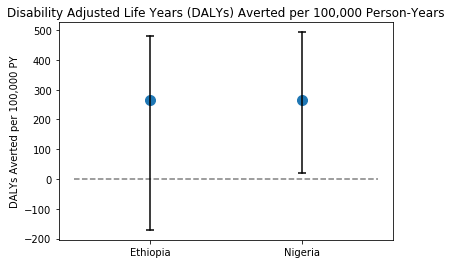

In [21]:
make_dot_plots(overall_results, 'dalys')

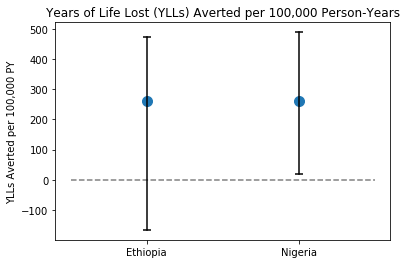

In [22]:
make_dot_plots(overall_results, 'ylls')

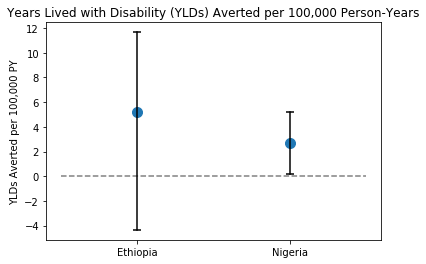

In [23]:
make_dot_plots(overall_results, 'ylds')

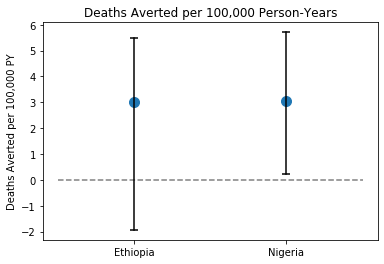

In [24]:
make_dot_plots(overall_results, 'deaths')